In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps
import matplotlib as mpl

dataset = pd.read_csv("dataset_concat.csv")

In [2]:
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['text.usetex'] = False
# Color cycle for color blind Source: https://gist.github.com/thriveth/8560036
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']   # https://gist.github.com/thriveth/8560036

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=CB_color_cycle) 

# Function for a consistent length of figures of 84 mm, converting to inches
def new_figure(height=55):
    "Return figure with width 84mm and given height in mm."
    return plt.figure(figsize=(84/10.16, height/10.16))

In [3]:
dataset.head()

,Sort_Type,Data_Type_or_List_type,List_length,Runtimes,Number_of_repeatitions,Datetime
0,merge_sort,sorted,10,0.267837,7,2019-11-01 21:51:45.110982
1,merge_sort,sorted,10,0.277732,7,2019-11-01 21:51:45.110982
2,merge_sort,sorted,10,0.274984,7,2019-11-01 21:51:45.110982
3,merge_sort,sorted,10,0.250366,7,2019-11-01 21:51:45.110982
4,merge_sort,sorted,10,0.233188,7,2019-11-01 21:51:45.110982


['random', 'reverse_sorted', 'sorted']
['heap_sort', 'merge_sort', 'numpy_sort', 'python_sorted', 'quick_sort']


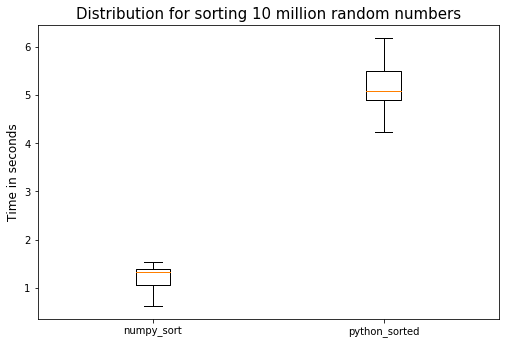

In [29]:
# def scatter_plot_times(size):
size = int(10485760)
filter = (dataset['List_length']==size)
df_size = pd.DataFrame( dataset[filter] )
df_size.reset_index( drop = True, inplace=True)

df_size['Single_runtime'] =  df_size['Runtimes']/df_size['Number_of_repeatitions']  

print(   sorted( np.unique(df_size['Data_Type_or_List_type']).tolist() )  )
print(   np.unique(df_size['Sort_Type']).tolist()   )


filter01 = (df_size['Data_Type_or_List_type']=='random')
df_data_type = df_size[filter01]  

# filter02 = (df_data_type['Sort_Type']==sort)
nump = df_data_type[(df_data_type['Sort_Type']=='numpy_sort')] ['Single_runtime']  
pyth = df_data_type[(df_data_type['Sort_Type']=='python_sorted')] ['Single_runtime']  
quick = df_data_type[(df_data_type['Sort_Type']=='quick_sort')] ['Single_runtime']  
merg = df_data_type[(df_data_type['Sort_Type']=='merge_sort')] ['Single_runtime']  
heap = df_data_type[(df_data_type['Sort_Type']=='heap_sort')] ['Single_runtime']  
data=[nump,pyth]

labels = ( 'numpy_sort', 'python_sorted')
fig = new_figure()
plt.boxplot( data )
plt.xticks(np.arange(len(labels))+1,labels)
plt.ylabel('Time in seconds')
plt.title("Distribution for sorting 10 million random numbers")
plt.xticks(np.arange(len(labels))+1,labels)
plt.savefig("normalised\Boxplots for numpy and python.pdf" , bbox_inches='tight')
plt.show()

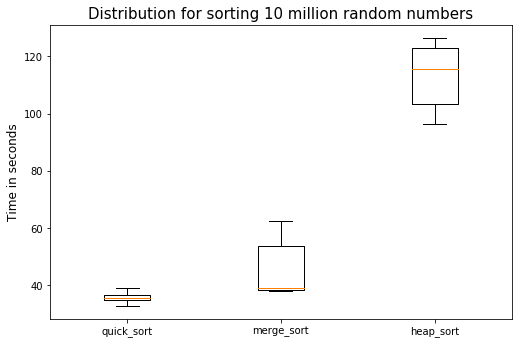

In [30]:
fig = new_figure()
data=[quick,merg,heap]
labels = (  'quick_sort','merge_sort', 'heap_sort'  )

plt.boxplot( data )
plt.xticks(np.arange(len(labels))+1,labels)
plt.ylabel('Time in seconds')
plt.title("Distribution for sorting 10 million random numbers")
plt.xticks(np.arange(len(labels))+1,labels)
plt.savefig("normalised\Boxplots for standalone sorts.pdf" , bbox_inches='tight')
plt.show()